In [152]:
import pandas as pd

In [153]:
df_train = pd.read_csv("/Users/lrush/Desktop/Breast-Cancer/breast-cancer-train.csv")
df_test = pd.read_csv("/Users/lrush/Desktop/Breast-Cancer/breast-cancer-test.csv")


In [154]:
df_test_positive = df_test.ix[lambda df: df.Type == 1, [1, 2]]; df_test_positive


,Clump Thickness,Cell Size
3,5,5
7,6,6
8,4,10
9,3,3
11,10,3
15,10,8
17,10,10
18,6,6
19,4,6
20,10,10


In [155]:
df_test_negative = df_test.ix[lambda df: df.Type == 0, [1, 2]]; df_test_negative


,Clump Thickness,Cell Size
0,1,2
1,1,1
2,1,1
4,1,1
5,1,1
6,3,2
10,1,1
12,1,1
13,1,1
14,1,1


In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

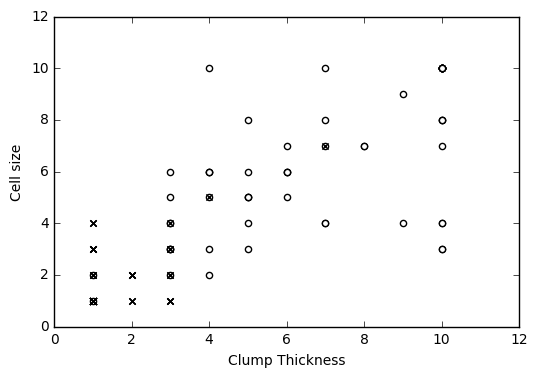

In [157]:
fig1 = plt.figure()
sp = fig1.add_subplot(111)

sp.scatter(df_test_positive.ix[:, 0], df_test_positive.ix[:, 1], c="white", marker="o")
sp.scatter(df_test_negative.ix[:, 0], df_test_negative.ix[:, 1], c="black", marker="x")
sp.set_xlabel("Clump Thickness")
sp.set_ylabel("Cell size")

In [158]:
import numpy as np
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

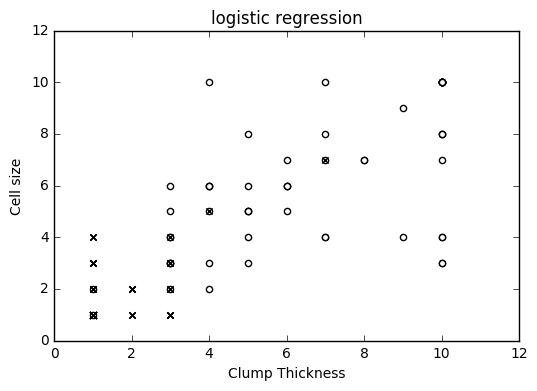

In [159]:
fig2 = plt.figure()
sp = fig2.add_subplot(111)

sp.scatter(df_test_positive.ix[:, 0], df_test_positive.ix[:, 1], c="white", marker="o")
sp.scatter(df_test_negative.ix[:, 0], df_test_negative.ix[:, 1], c="black", marker="x")
sp.set_xlabel("Clump Thickness")
sp.set_ylabel("Cell size")
sp.set_title("logistic regression")

Testing accuracy(10): 0.868571428571


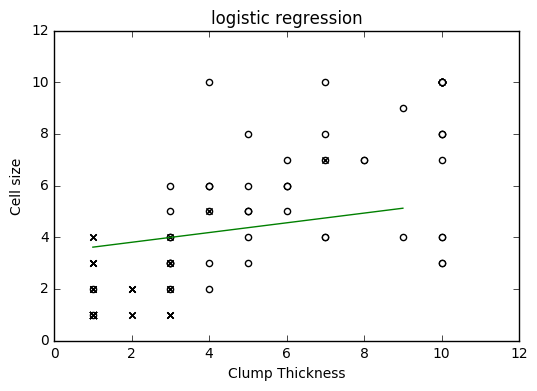

In [160]:
df_train
lr.fit(df_train.ix[:10, [1, 2]], df_train.ix[:10, 3])
print("Testing accuracy(10):", lr.score(df_test.ix[:, [1, 2]], df_test.ix[:, 3]))
intercept, coef = lr.intercept_, lr.coef_[0, :]
lx = np.arange(df_test.ix[:, 1].min(), df_test.ix[:, 1].max())
fig2.get_axes()[0].plot(lx, (-intercept - lx * coef[0]) / coef[1], c="green")
fig2

Testing accuracy(all): 0.937142857143


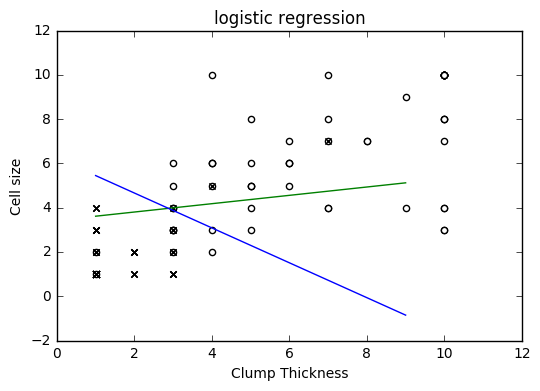

In [161]:

lr.fit(df_train.ix[:, [1, 2]], df_train.ix[:, 3])
print("Testing accuracy(all):", lr.score(df_test.ix[:, [1, 2]], df_test.ix[:, 3]))
intercept, coef = lr.intercept_, lr.coef_[0, :]
lx = np.arange(df_test.ix[:, 1].min(), df_test.ix[:, 1].max())
fig2.get_axes()[0].plot(lx, (-intercept - lx * coef[0]) / coef[1], c="blue")
fig2